In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=16)

In [3]:
RESULTS_BASEDIR = "../dogo_results/mopo"
get_results_path = lambda x: os.path.join(RESULTS_BASEDIR, x)

# MP068-MP069

In [4]:
MP068_MODEL_TOTAL_LOSS_PATH        = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_loss_history.txt")
MP068_MODEL_POL_TOTAL_LOSS_PATH    = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_pol_total_loss_history.txt")
MP068_MODEL_POL_VAR_LOSS_PATH      = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_pol_var_loss_history.txt")
MP068_MODEL_POL_MEAN_LOSS_PATH     = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_mean_pol_loss_history.txt")
MP068_MODEL_HO_TOTAL_LOSS_PATH     = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_holdout_loss_history.txt")
MP068_MODEL_HO_POL_TOTAL_LOSS_PATH = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_holdout_pol_total_loss_history.txt")
MP068_MODEL_HO_POL_VAR_LOSS_PATH   = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_holdout_pol_var_loss_history.txt")
MP068_MODEL_HO_POL_MEAN_LOSS_PATH  = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/model_holdout_mean_pol_loss_history.txt")

MP069_MODEL_TOTAL_LOSS_PATH        = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_loss_history.txt")
MP069_MODEL_POL_TOTAL_LOSS_PATH    = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_pol_total_loss_history.txt")
MP069_MODEL_POL_VAR_LOSS_PATH      = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_pol_var_loss_history.txt")
MP069_MODEL_POL_MEAN_LOSS_PATH     = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_mean_pol_loss_history.txt")
MP069_MODEL_HO_TOTAL_LOSS_PATH     = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_holdout_loss_history.txt")
MP069_MODEL_HO_POL_TOTAL_LOSS_PATH = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_holdout_pol_total_loss_history.txt")
MP069_MODEL_HO_POL_VAR_LOSS_PATH   = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_holdout_pol_var_loss_history.txt")
MP069_MODEL_HO_POL_MEAN_LOSS_PATH  = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/model_holdout_mean_pol_loss_history.txt")

In [5]:
MP068_total_loss_df        = pd.read_csv(MP068_MODEL_TOTAL_LOSS_PATH, header=None)
MP068_pol_total_loss_df    = pd.read_csv(MP068_MODEL_POL_TOTAL_LOSS_PATH, header=None)
MP068_pol_var_loss_df      = pd.read_csv(MP068_MODEL_POL_VAR_LOSS_PATH, header=None)
MP068_pol_mean_loss_df     = pd.read_csv(MP068_MODEL_POL_MEAN_LOSS_PATH, header=None)
MP068_ho_total_loss_df     = pd.read_csv(MP068_MODEL_HO_TOTAL_LOSS_PATH, header=None)
MP068_ho_pol_total_loss_df = pd.read_csv(MP068_MODEL_HO_POL_TOTAL_LOSS_PATH, header=None)
MP068_ho_pol_var_loss_df   = pd.read_csv(MP068_MODEL_HO_POL_VAR_LOSS_PATH, header=None)
MP068_ho_pol_mean_loss_df  = pd.read_csv(MP068_MODEL_HO_POL_MEAN_LOSS_PATH, header=None)

MP069_total_loss_df        = pd.read_csv(MP069_MODEL_TOTAL_LOSS_PATH, header=None)
MP069_pol_total_loss_df    = pd.read_csv(MP069_MODEL_POL_TOTAL_LOSS_PATH, header=None)
MP069_pol_var_loss_df      = pd.read_csv(MP069_MODEL_POL_VAR_LOSS_PATH, header=None)
MP069_pol_mean_loss_df     = pd.read_csv(MP069_MODEL_POL_MEAN_LOSS_PATH, header=None)
MP069_ho_total_loss_df     = pd.read_csv(MP069_MODEL_HO_TOTAL_LOSS_PATH, header=None)
MP069_ho_pol_total_loss_df = pd.read_csv(MP069_MODEL_HO_POL_TOTAL_LOSS_PATH, header=None)
MP069_ho_pol_var_loss_df   = pd.read_csv(MP069_MODEL_HO_POL_VAR_LOSS_PATH, header=None)
MP069_ho_pol_mean_loss_df  = pd.read_csv(MP069_MODEL_HO_POL_MEAN_LOSS_PATH, header=None)

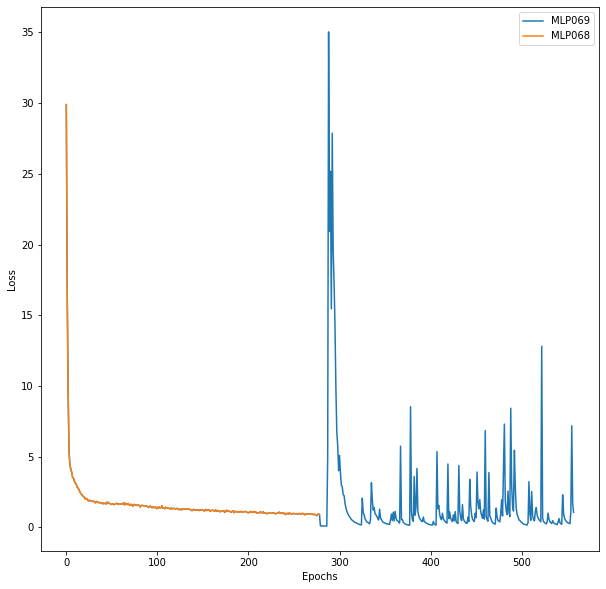

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP069_total_loss_df.mean(axis=1), label='MLP069')
ax.plot(MP068_total_loss_df.mean(axis=1), label='MLP068')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
pass

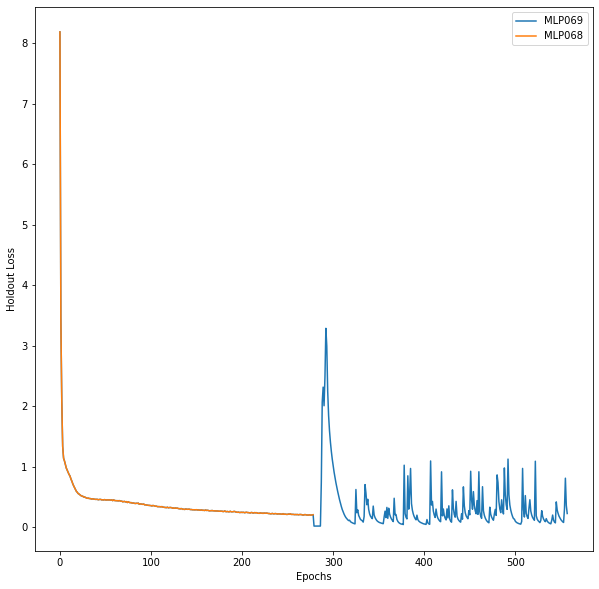

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP069_ho_total_loss_df.mean(axis=1), label='MLP069')
ax.plot(MP068_ho_total_loss_df.mean(axis=1), label='MLP068')
ax.set_xlabel('Epochs')
ax.set_ylabel('Holdout Loss')
ax.legend()
pass

In [8]:
MP068_PROGRESS_PATH = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-2332hq9q4z/result.json")
MP069_PROGRESS_PATH = get_results_path("ray_mopo/HalfCheetah/halfcheetah_d3rlpy_pep3_101e3/seed:1443_2022-05-25_13-42-23e1g5yr31/result.json")

In [9]:
MP068_df = pd.read_json(MP068_PROGRESS_PATH, lines=True)
MP069_df = pd.read_json(MP069_PROGRESS_PATH, lines=True)

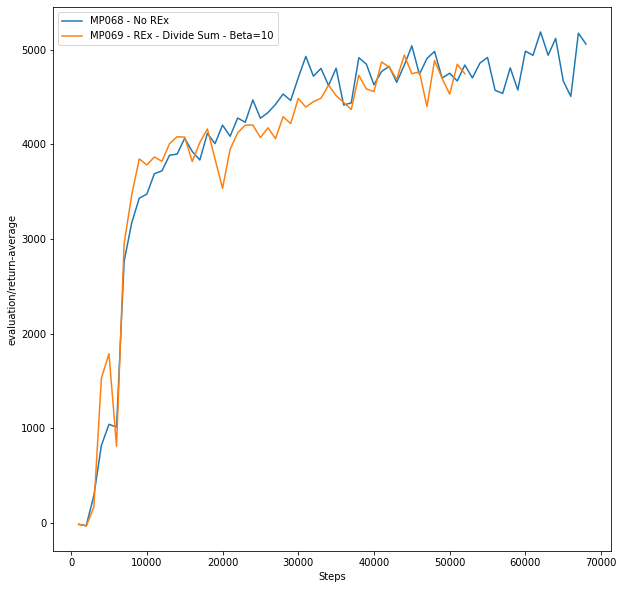

In [10]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP069_df['timesteps_total'], MP069_df[feature], label='MP069 - REx - Divide Sum - Beta=10')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

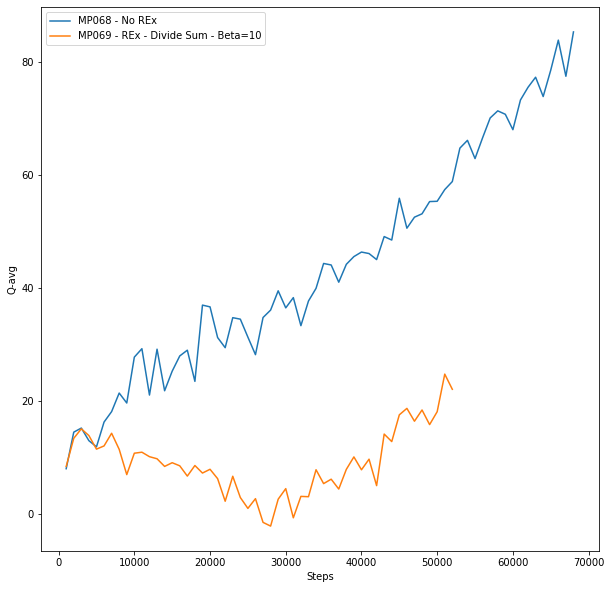

In [11]:
feature = 'Q-avg'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP069_df['timesteps_total'], MP069_df[feature], label='MP069 - REx - Divide Sum - Beta=10')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

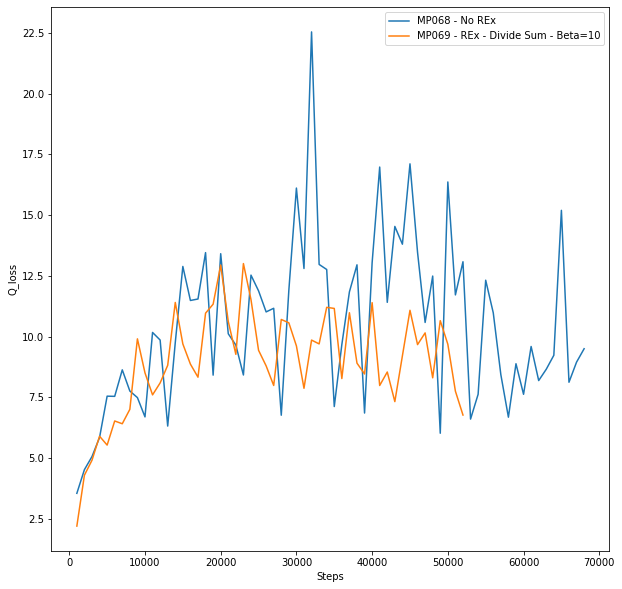

In [12]:
feature = 'Q_loss'
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(MP068_df['timesteps_total'], MP068_df[feature], label='MP068 - No REx')
ax.plot(MP069_df['timesteps_total'], MP069_df[feature], label='MP069 - REx - Divide Sum - Beta=10')
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass